In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/.DS_Store
/kaggle/input/playground-series-s4e10/test.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/sample_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')

In [3]:
df1 = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [4]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
df1.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


# Work On Train Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='person_age'>

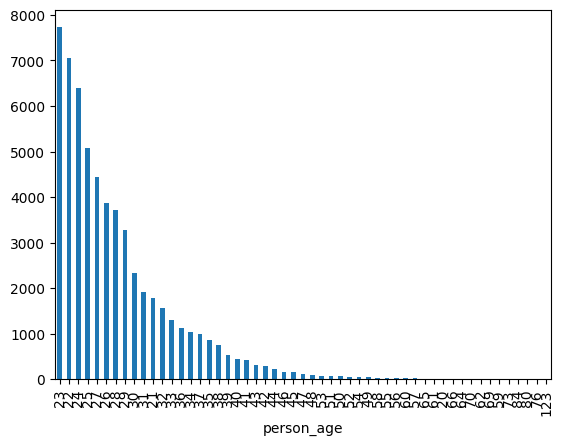

In [10]:
df['person_age'].value_counts().plot(kind = 'bar')

In [11]:
df['person_age'].unique()

array([ 37,  22,  29,  30,  27,  25,  21,  35,  31,  26,  28,  32,  23,
        24,  33,  44,  38,  43,  46,  48,  36,  41,  34,  40,  47,  42,
        51,  50,  39,  56,  60,  49,  58,  54,  45,  59,  65,  53,  55,
        57,  52,  62,  64,  84,  70,  66,  73,  69,  61,  20,  80,  76,
       123])

<Axes: >

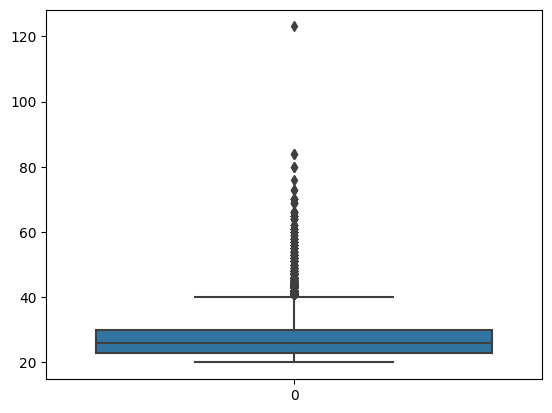

In [12]:
sns.boxplot(df['person_age'])

In [13]:
# Calculate the 25th and 75th percentiles
percentile25 = df['person_age'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['person_age'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['person_age'] = np.where(
    new_df['person_age'] > uplimit, uplimit,
    np.where(new_df['person_age'] < lolimit, lolimit, new_df['person_age'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 23.0
75th Percentile: 30.0
Upper Limit: 40.5 Lower Limit: 12.5
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0          35000                  RENT                0.0   
1   1        22.0          56000                   OWN                6.0   
2   2        29.0          28800                   OWN                8.0   
3   3        30.0          70000                  RENT               14.0   
4   4        22.0          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_p

<Axes: >

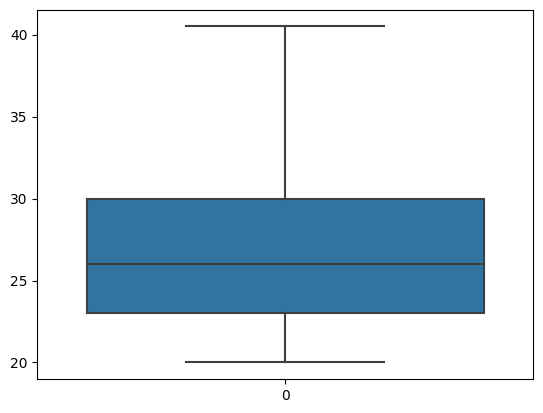

In [14]:
sns.boxplot(df['person_age'])

<Axes: >

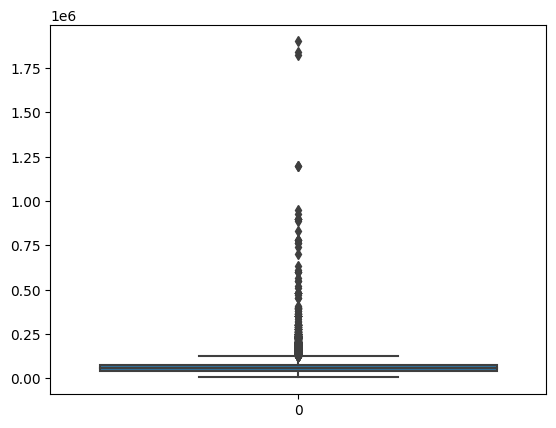

In [15]:
sns.boxplot(df['person_income'])

In [16]:
# Calculate the 25th and 75th percentiles
percentile25 = df['person_income'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['person_income'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['person_income'] = np.where(
    new_df['person_income'] > uplimit, uplimit,
    np.where(new_df['person_income'] < lolimit, lolimit, new_df['person_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 42000.0
75th Percentile: 75600.0
Upper Limit: 126000.0 Lower Limit: -8400.0
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.

<Axes: >

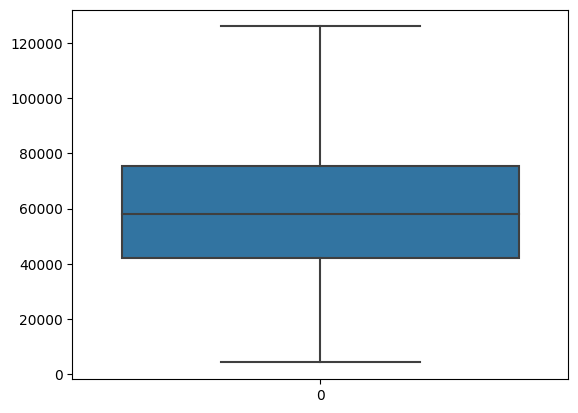

In [17]:
sns.boxplot(df['person_income'])

<Axes: xlabel='person_home_ownership'>

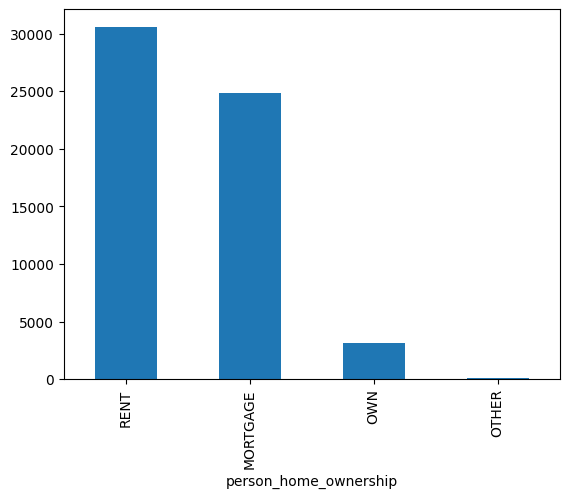

In [18]:
df['person_home_ownership'].value_counts().plot(kind = 'bar')

In [19]:
df['person_home_ownership'] = df['person_home_ownership'].str.replace('OTHER', 'OWN', regex=False)


<Axes: xlabel='person_home_ownership'>

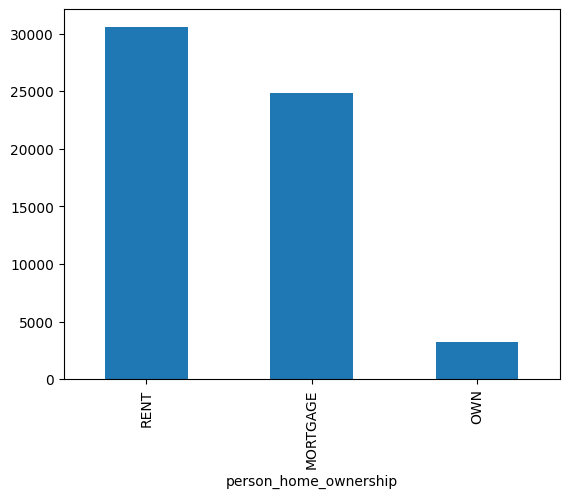

In [20]:
df['person_home_ownership'].value_counts().plot(kind = 'bar')

In [21]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0


<Axes: >

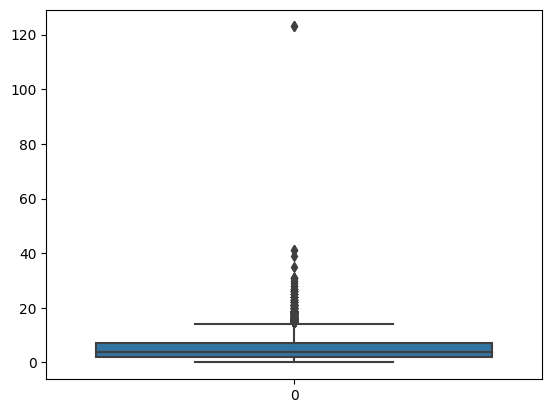

In [22]:
sns.boxplot(df['person_emp_length'])

In [23]:
# Calculate the 25th and 75th percentiles
percentile25 = df['person_emp_length'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['person_emp_length'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['person_emp_length'] = np.where(
    new_df['person_emp_length'] > uplimit, uplimit,
    np.where(new_df['person_emp_length'] < lolimit, lolimit, new_df['person_emp_length'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 2.0
75th Percentile: 7.0
Upper Limit: 14.5 Lower Limit: -5.5
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_per

<Axes: >

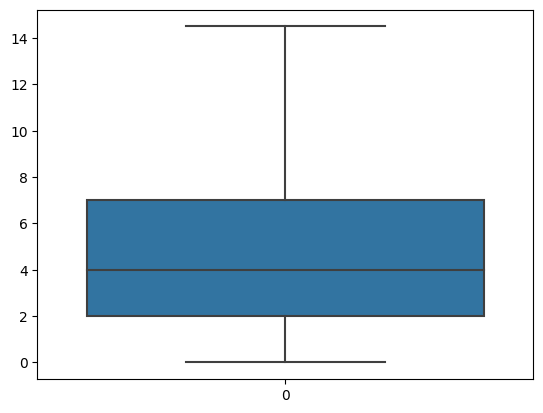

In [24]:
sns.boxplot(df['person_emp_length'])

<Axes: xlabel='loan_intent'>

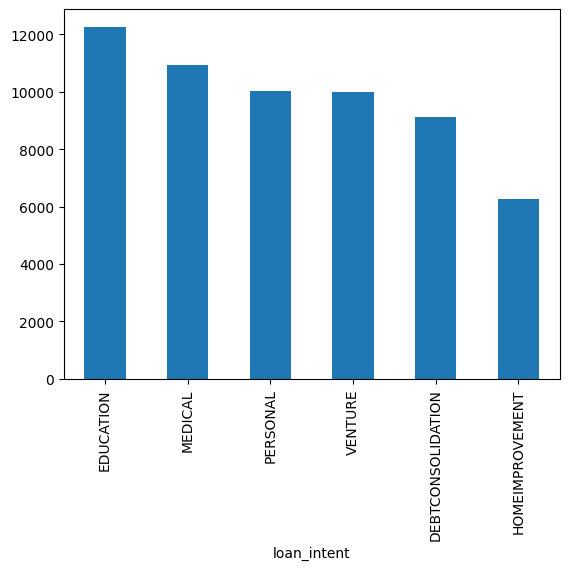

In [25]:
df['loan_intent'].value_counts().plot(kind = 'bar')

<Axes: xlabel='loan_grade'>

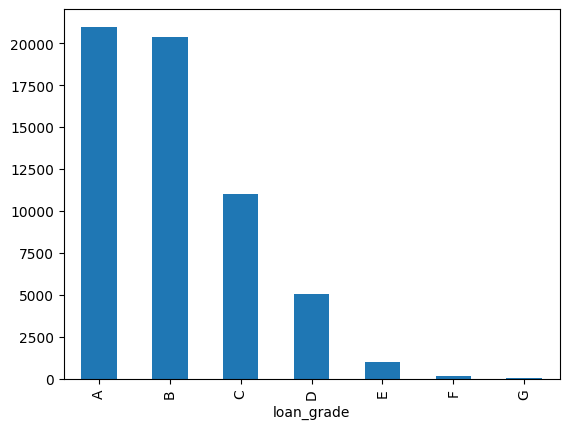

In [26]:
df['loan_grade'].value_counts().plot(kind = 'bar')

In [27]:
df['loan_grade'] = df['loan_grade'].str.replace('F', 'G', regex=False)

<Axes: xlabel='loan_grade'>

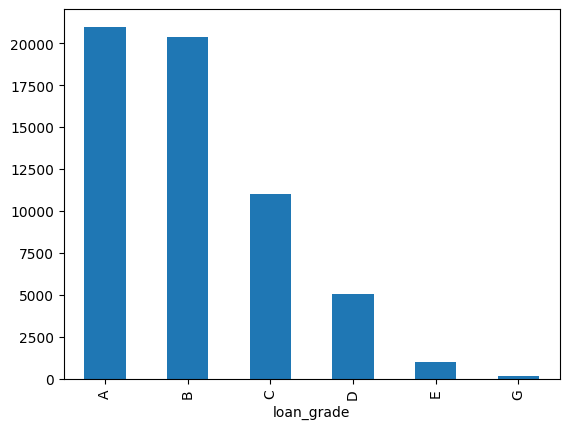

In [28]:
df['loan_grade'].value_counts().plot(kind = 'bar')

In [29]:
df['loan_grade'] = df['loan_grade'].str.replace('G', 'E', regex=False)

<Axes: xlabel='loan_grade'>

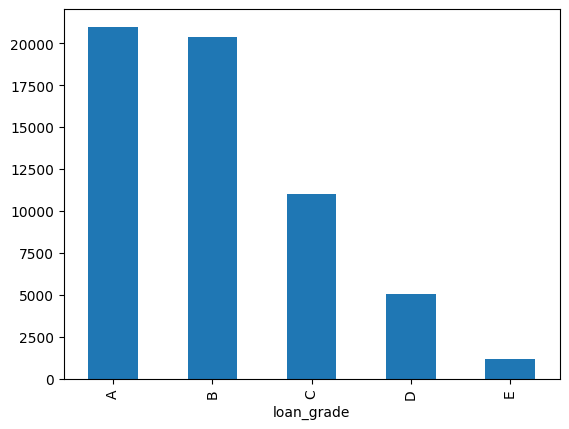

In [30]:
df['loan_grade'].value_counts().plot(kind = 'bar')

In [31]:
df['loan_grade'] = df['loan_grade'].str.replace('E', 'D', regex=False)

<Axes: xlabel='loan_grade'>

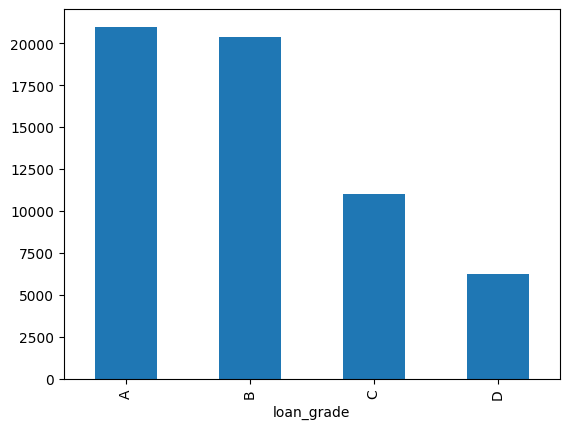

In [32]:
df['loan_grade'].value_counts().plot(kind = 'bar')

In [33]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29.0,28800.0,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30.0,70000.0,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22.0,60000.0,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


<Axes: >

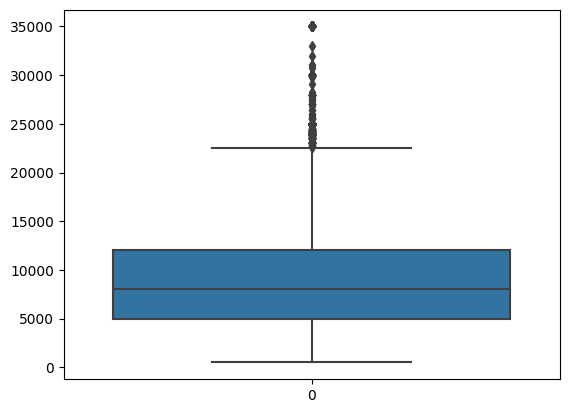

In [34]:
sns.boxplot(df['loan_amnt'])

In [35]:
# Calculate the 25th and 75th percentiles
percentile25 = df['loan_amnt'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['loan_amnt'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['loan_amnt'] = np.where(
    new_df['loan_amnt'] > uplimit, uplimit,
    np.where(new_df['loan_amnt'] < lolimit, lolimit, new_df['loan_amnt'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 5000.0
75th Percentile: 12000.0
Upper Limit: 22500.0 Lower Limit: -5500.0
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B     6000.0          11.49                 0.17   
1     MEDICAL          C     4000.0          13.35                 0.07   
2    PERSONAL          A     6000.0           8.90                 0.21   
3     VENTURE          B    12000.0          11.11                 0.17   
4     MEDICAL          A     6000.0           6.92                 0.10

<Axes: >

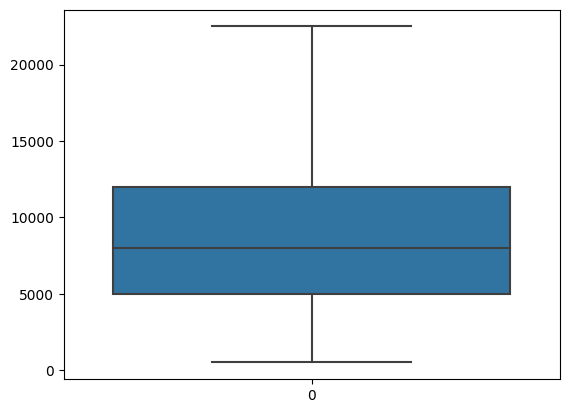

In [36]:
sns.boxplot(df['loan_amnt'])

<Axes: >

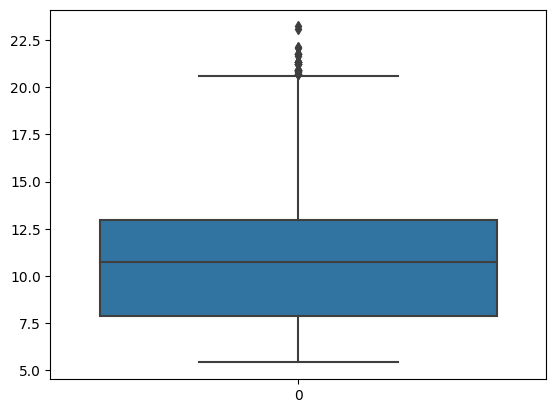

In [37]:
sns.boxplot(df['loan_int_rate'])

In [38]:
# Calculate the 25th and 75th percentiles
percentile25 = df['loan_int_rate'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['loan_int_rate'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['loan_int_rate'] = np.where(
    new_df['loan_int_rate'] > uplimit, uplimit,
    np.where(new_df['loan_int_rate'] < lolimit, lolimit, new_df['loan_int_rate'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 7.88
75th Percentile: 12.99
Upper Limit: 20.655 Lower Limit: 0.21499999999999897
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B     6000.0          11.49                 0.17   
1     MEDICAL          C     4000.0          13.35                 0.07   
2    PERSONAL          A     6000.0           8.90                 0.21   
3     VENTURE          B    12000.0          11.11                 0.17   
4     MEDICAL          A     6000.0           6.92              

<Axes: >

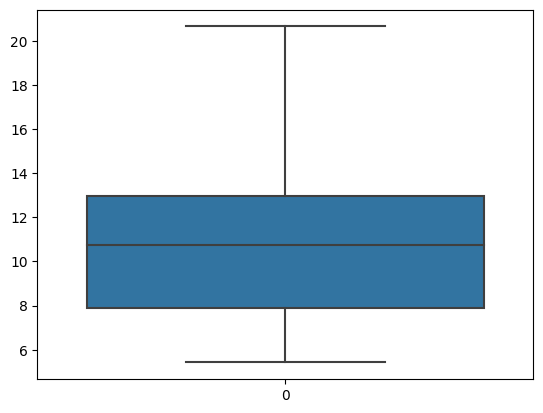

In [39]:
sns.boxplot(df['loan_int_rate'])

<Axes: >

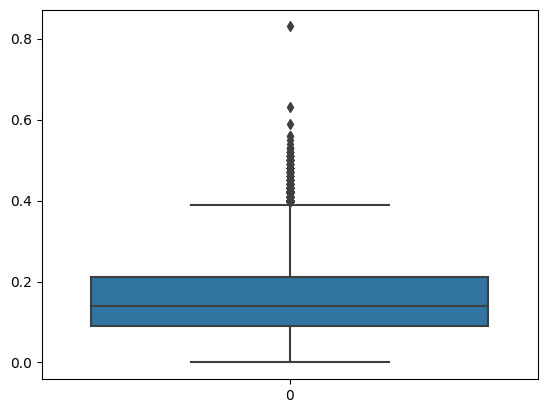

In [40]:
sns.boxplot(df['loan_percent_income'])

In [41]:
# Calculate the 25th and 75th percentiles
percentile25 = df['loan_percent_income'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['loan_percent_income'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['loan_percent_income'] = np.where(
    new_df['loan_percent_income'] > uplimit, uplimit,
    np.where(new_df['loan_percent_income'] < lolimit, lolimit, new_df['loan_percent_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 0.09
75th Percentile: 0.21
Upper Limit: 0.39 Lower Limit: -0.09
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B     6000.0          11.49                 0.17   
1     MEDICAL          C     4000.0          13.35                 0.07   
2    PERSONAL          A     6000.0           8.90                 0.21   
3     VENTURE          B    12000.0          11.11                 0.17   
4     MEDICAL          A     6000.0           6.92                 0.10   

  cb_

<Axes: >

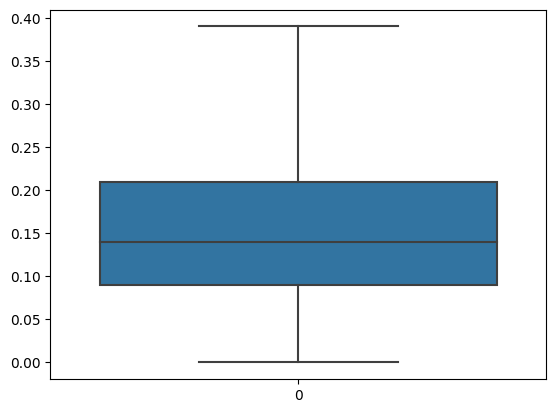

In [42]:
sns.boxplot(df['loan_percent_income'])

<Axes: >

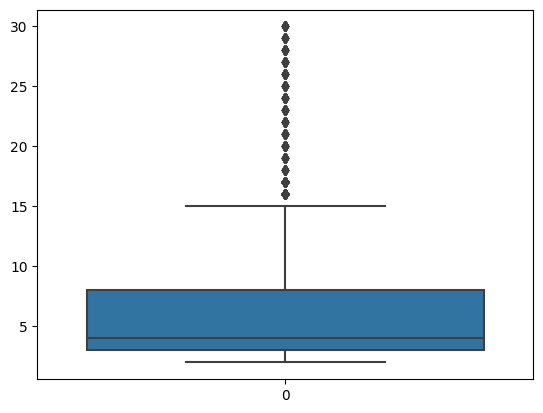

In [43]:
sns.boxplot(df['cb_person_cred_hist_length'])

In [44]:
# Calculate the 25th and 75th percentiles
percentile25 = df['cb_person_cred_hist_length'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['cb_person_cred_hist_length'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['cb_person_cred_hist_length'] = np.where(
    new_df['cb_person_cred_hist_length'] > uplimit, uplimit,
    np.where(new_df['cb_person_cred_hist_length'] < lolimit, lolimit, new_df['loan_percent_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 3.0
75th Percentile: 8.0
Upper Limit: 15.5 Lower Limit: -4.5
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B     6000.0          11.49                 0.17   
1     MEDICAL          C     4000.0          13.35                 0.07   
2    PERSONAL          A     6000.0           8.90                 0.21   
3     VENTURE          B    12000.0          11.11                 0.17   
4     MEDICAL          A     6000.0           6.92                 0.10   

  cb_per

<Axes: >

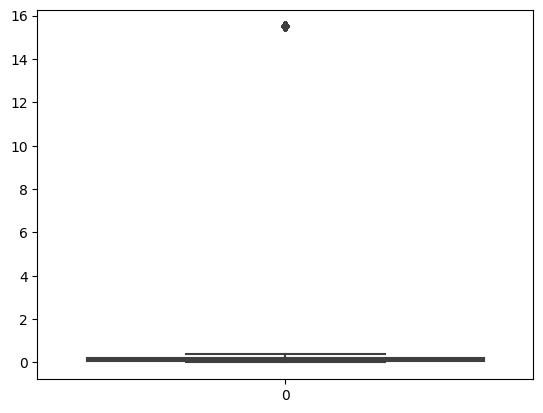

In [45]:
sns.boxplot(df['cb_person_cred_hist_length'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cb_person_cred_hist_length', ylabel='Density'>

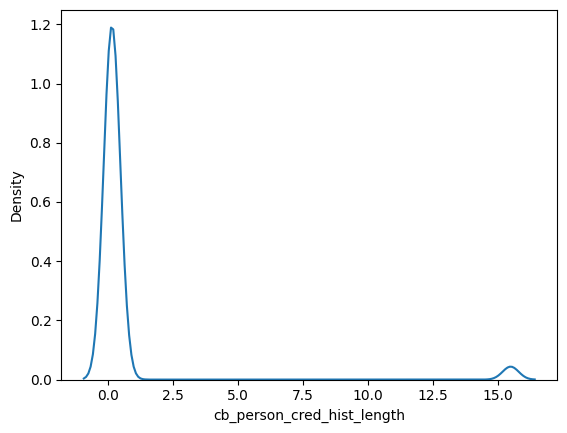

In [46]:
sns.kdeplot(df['cb_person_cred_hist_length'])

In [47]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,0.17,0
1,1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,0.07,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  float64
 2   person_income               58645 non-null  float64
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  float64
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  float64
 12  loan_status                 58645 non-null  int64  
dtypes: float64(7), int64(2), object

In [49]:
df['person_age'] = df['person_age'].astype(int)

In [50]:
df['person_income'] = df['person_income'].astype(int)

In [51]:
df['person_emp_length'] = df['person_emp_length'].astype(int)

In [52]:
df['loan_amnt'] = df['loan_amnt'].astype(int)

In [53]:
df['loan_int_rate'] = df['loan_int_rate'].astype(int)

In [54]:
df['loan_percent_income'] = df['loan_percent_income'].astype(int)

In [55]:
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          58645 non-null  int64 
 1   person_age                  58645 non-null  int64 
 2   person_income               58645 non-null  int64 
 3   person_home_ownership       58645 non-null  object
 4   person_emp_length           58645 non-null  int64 
 5   loan_intent                 58645 non-null  object
 6   loan_grade                  58645 non-null  object
 7   loan_amnt                   58645 non-null  int64 
 8   loan_int_rate               58645 non-null  int64 
 9   loan_percent_income         58645 non-null  int64 
 10  cb_person_default_on_file   58645 non-null  object
 11  cb_person_cred_hist_length  58645 non-null  int64 
 12  loan_status                 58645 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 5.8+ MB


In [57]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11,0,N,0,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13,0,N,0,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8,0,N,0,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11,0,N,0,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6,0,N,0,0


In [58]:
df.drop(columns =['cb_person_default_on_file','cb_person_cred_hist_length'],inplace = True)

In [59]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11,0,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13,0,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8,0,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11,0,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6,0,0


# Work on Test Dataset

In [60]:
df1.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [62]:
df1.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [63]:
df1.duplicated().sum()

0

<Axes: xlabel='person_age'>

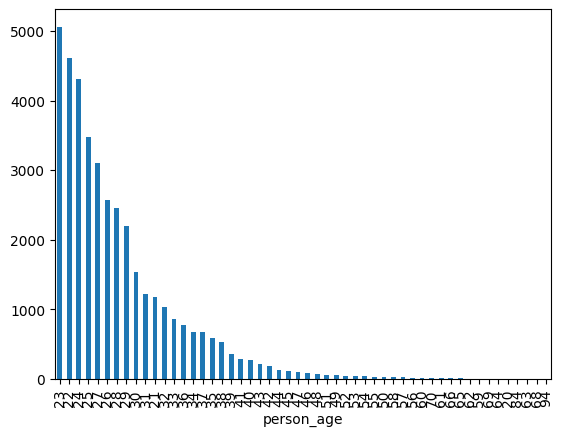

In [64]:
df1['person_age'].value_counts().plot(kind = 'bar')

<Axes: >

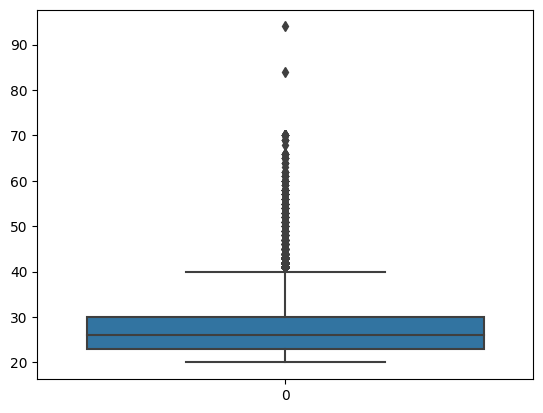

In [65]:
sns.boxplot(df1['person_age'])

In [66]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['person_age'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['person_age'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['person_age'] = np.where(
    new_df['person_age'] > uplimit, uplimit,
    np.where(new_df['person_age'] < lolimit, lolimit, new_df['person_age'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 23.0
75th Percentile: 30.0
Upper Limit: 40.5 Lower Limit: 12.5
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0          69000                  RENT                3.0   
1  58646        26.0          96000              MORTGAGE                6.0   
2  58647        26.0          30000                  RENT                5.0   
3  58648        33.0          50000                  RENT                4.0   
4  58649        26.0         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_le

<Axes: >

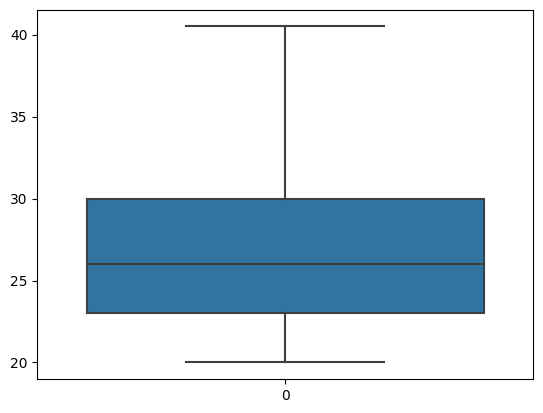

In [67]:
sns.boxplot(df1['person_age'])

In [68]:
df1.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23.0,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26.0,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4


<Axes: >

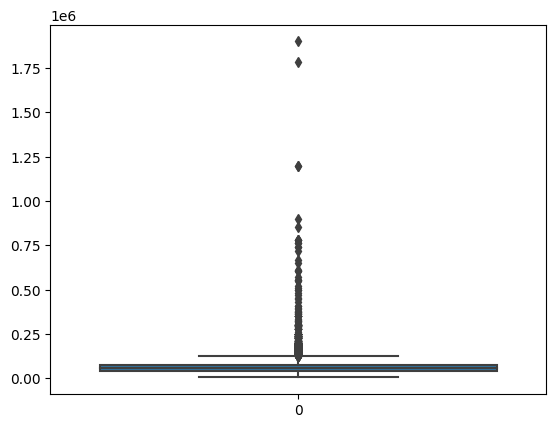

In [69]:
sns.boxplot(df1['person_income'])

In [70]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['person_income'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['person_income'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['person_income'] = np.where(
    new_df['person_income'] > uplimit, uplimit,
    np.where(new_df['person_income'] < lolimit, lolimit, new_df['person_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 42000.0
75th Percentile: 75885.0
Upper Limit: 126712.5 Lower Limit: -8827.5
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person

<Axes: >

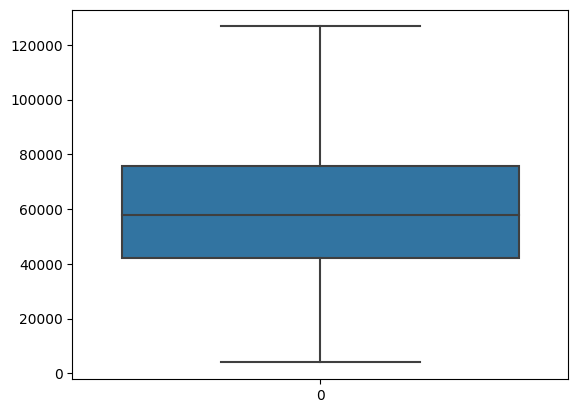

In [71]:
sns.boxplot(df1['person_income'])

<Axes: >

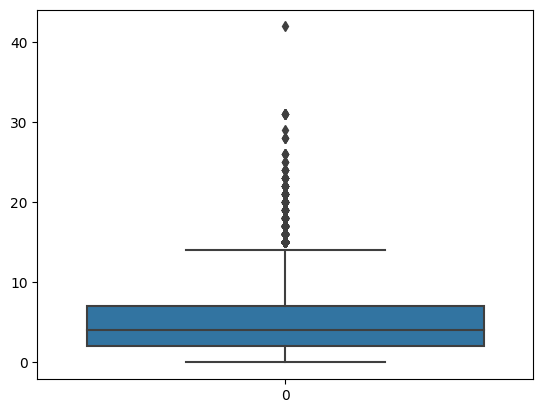

In [72]:
sns.boxplot(df1['person_emp_length'])

In [73]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['person_emp_length'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['person_emp_length'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['person_emp_length'] = np.where(
    new_df['person_emp_length'] > uplimit, uplimit,
    np.where(new_df['person_emp_length'] < lolimit, lolimit, new_df['person_emp_length'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 2.0
75th Percentile: 7.0
Upper Limit: 14.5 Lower Limit: -5.5
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_leng

<Axes: >

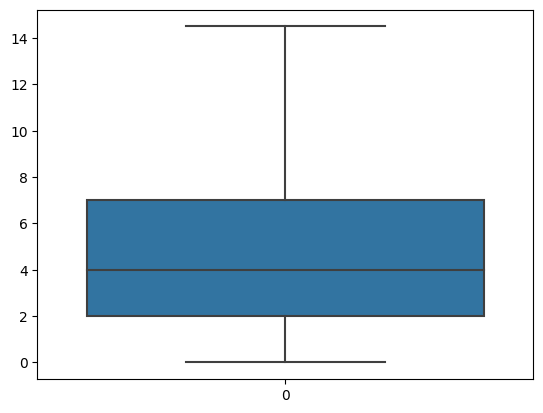

In [74]:
sns.boxplot(df1['person_emp_length'])

<Axes: >

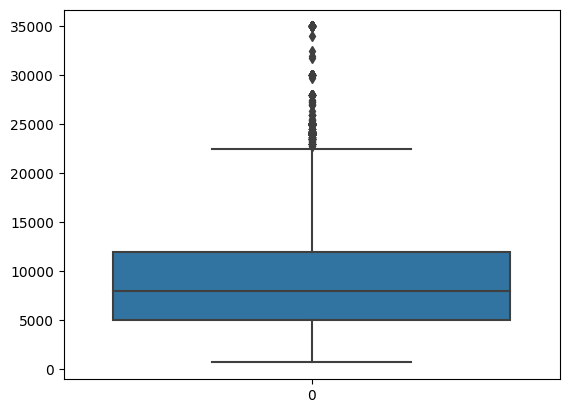

In [75]:
sns.boxplot(df1['loan_amnt'])

In [76]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['loan_amnt'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['loan_amnt'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['loan_amnt'] = np.where(
    new_df['loan_amnt'] > uplimit, uplimit,
    np.where(new_df['loan_amnt'] < lolimit, lolimit, new_df['loan_amnt'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 5000.0
75th Percentile: 12000.0
Upper Limit: 22500.0 Lower Limit: -5500.0
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F    22500.0          15.76   
1           PERSONAL          C    10000.0          12.68   
2            VENTURE          E     4000.0          17.19   
3  DEBTCONSOLIDATION          A     7000.0           8.90   
4    HOMEIMPROVEMENT          D    15000.0          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_c

<Axes: >

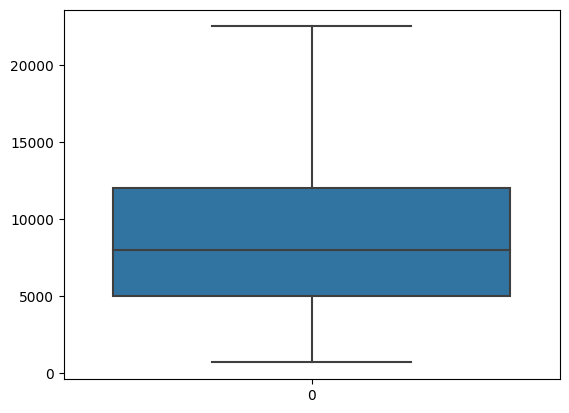

In [77]:
sns.boxplot(df1['loan_amnt'])

<Axes: >

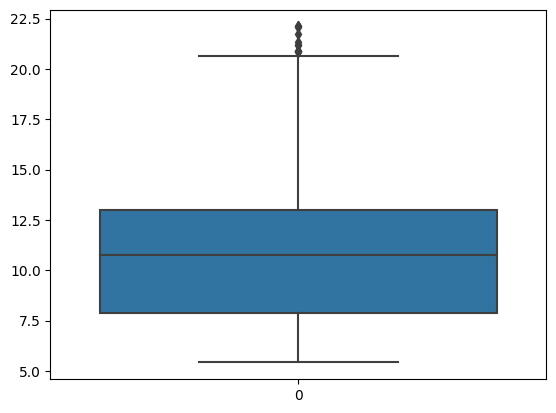

In [78]:
sns.boxplot(df1['loan_int_rate'])

In [79]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['loan_int_rate'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['loan_int_rate'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['loan_int_rate'] = np.where(
    new_df['loan_int_rate'] > uplimit, uplimit,
    np.where(new_df['loan_int_rate'] < lolimit, lolimit, new_df['loan_int_rate'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 7.88
75th Percentile: 12.99
Upper Limit: 20.655 Lower Limit: 0.21499999999999897
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F    22500.0          15.76   
1           PERSONAL          C    10000.0          12.68   
2            VENTURE          E     4000.0          17.19   
3  DEBTCONSOLIDATION          A     7000.0           8.90   
4    HOMEIMPROVEMENT          D    15000.0          16.32   

   loan_percent_income cb_person_default_on_file  cb_p

<Axes: >

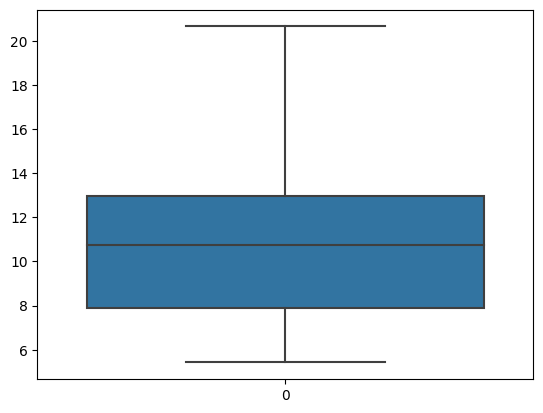

In [80]:
sns.boxplot(df1['loan_int_rate'])

<Axes: >

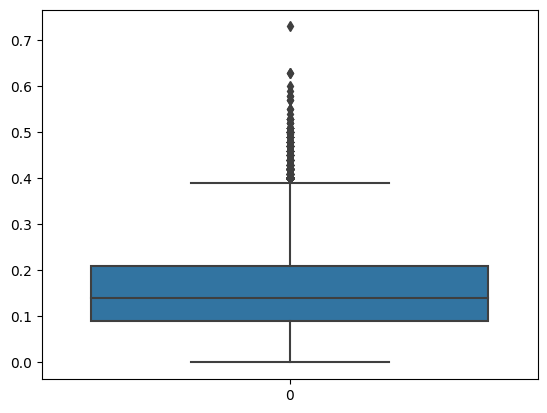

In [81]:
sns.boxplot(df1['loan_percent_income'])

In [82]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['loan_percent_income'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['loan_percent_income'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['loan_percent_income'] = np.where(
    new_df['loan_percent_income'] > uplimit, uplimit,
    np.where(new_df['loan_percent_income'] < lolimit, lolimit, new_df['loan_percent_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 0.09
75th Percentile: 0.21
Upper Limit: 0.39 Lower Limit: -0.09
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F    22500.0          15.76   
1           PERSONAL          C    10000.0          12.68   
2            VENTURE          E     4000.0          17.19   
3  DEBTCONSOLIDATION          A     7000.0           8.90   
4    HOMEIMPROVEMENT          D    15000.0          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_l

<Axes: >

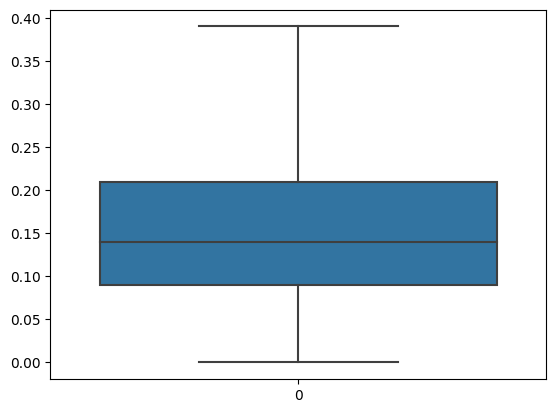

In [83]:
sns.boxplot(df1['loan_percent_income'])

In [84]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11,0,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13,0,0


In [85]:
df1.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23.0,69000.0,RENT,3.0,HOMEIMPROVEMENT,F,22500.0,15.76,0.36,N,2
1,58646,26.0,96000.0,MORTGAGE,6.0,PERSONAL,C,10000.0,12.68,0.10,Y,4


In [86]:
df1.drop(columns =['cb_person_default_on_file','cb_person_cred_hist_length'],inplace = True)

In [87]:
df1.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
0,58645,23.0,69000.0,RENT,3.0,HOMEIMPROVEMENT,F,22500.0,15.76,0.36
1,58646,26.0,96000.0,MORTGAGE,6.0,PERSONAL,C,10000.0,12.68,0.10


In [88]:
df1['person_age'] = df1['person_age'].astype(int)

In [89]:

df1['person_income'] = df1['person_income'].astype(int)


In [90]:

df1['person_emp_length'] = df1['person_emp_length'].astype(int)


In [91]:
df1['loan_amnt'] = df1['loan_amnt'].astype(int)


In [92]:

df1['loan_int_rate'] = df1['loan_int_rate'].astype(int)


In [93]:

df1['loan_percent_income'] = df1['loan_percent_income'].astype(int)

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     39098 non-null  int64 
 1   person_age             39098 non-null  int64 
 2   person_income          39098 non-null  int64 
 3   person_home_ownership  39098 non-null  object
 4   person_emp_length      39098 non-null  int64 
 5   loan_intent            39098 non-null  object
 6   loan_grade             39098 non-null  object
 7   loan_amnt              39098 non-null  int64 
 8   loan_int_rate          39098 non-null  int64 
 9   loan_percent_income    39098 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 3.0+ MB


<Axes: xlabel='person_home_ownership'>

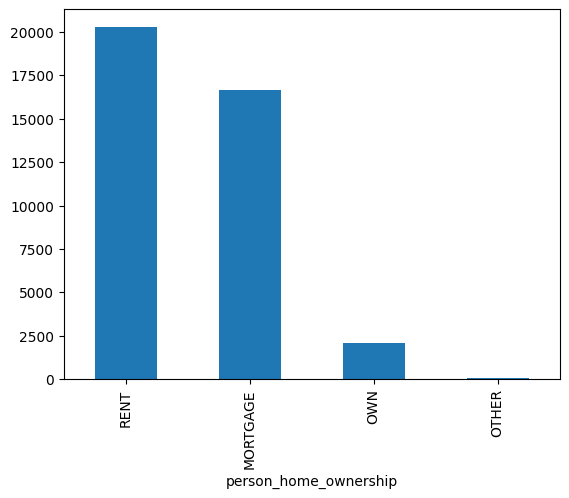

In [95]:
df1['person_home_ownership'].value_counts().plot(kind = 'bar')

In [96]:
df1['person_home_ownership'] = df['person_home_ownership'].str.replace('OTHER', 'OWN', regex=False)

<Axes: xlabel='person_home_ownership'>

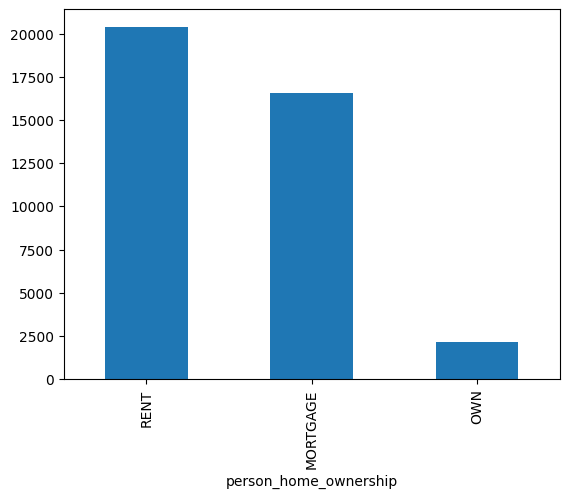

In [97]:
df1['person_home_ownership'].value_counts().plot(kind = 'bar')

<Axes: xlabel='loan_intent'>

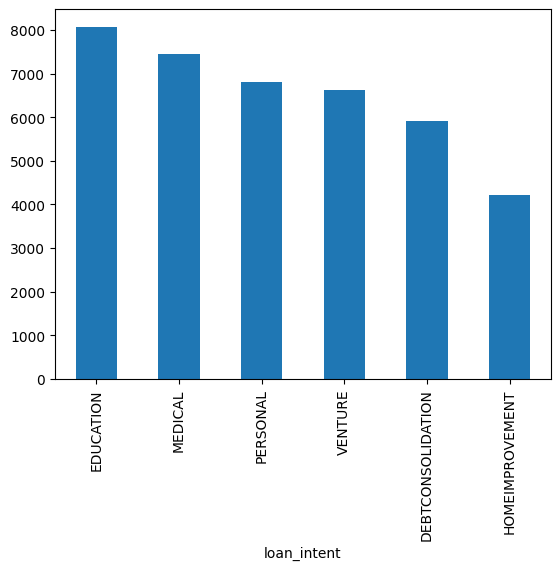

In [98]:
df1['loan_intent'].value_counts().plot(kind = 'bar')

<Axes: xlabel='loan_grade'>

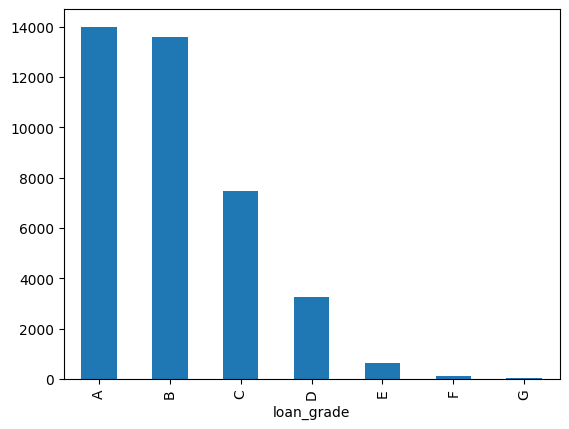

In [99]:
df1['loan_grade'].value_counts().plot(kind = 'bar')

In [100]:
df1['loan_grade'] = df1['loan_grade'].str.replace('F', 'G', regex=False)

In [101]:
df1['loan_grade'] = df1['loan_grade'].str.replace('G', 'E', regex=False)

In [102]:
df1['loan_grade'] = df1['loan_grade'].str.replace('E', 'D', regex=False)

<Axes: xlabel='loan_grade'>

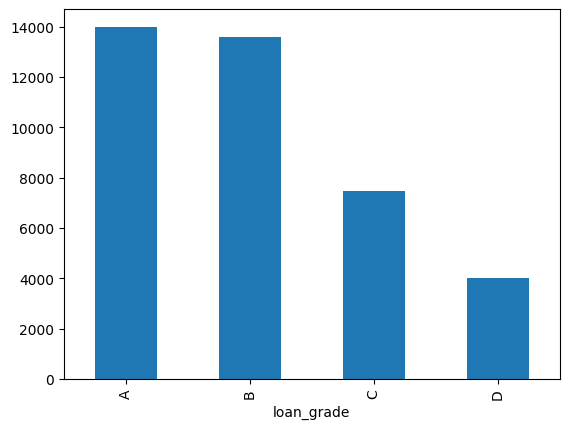

In [103]:
df1['loan_grade'].value_counts().plot(kind = 'bar')

In [104]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11,0,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13,0,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8,0,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11,0,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6,0,0


In [105]:
df1.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
0,58645,23,69000,RENT,3,HOMEIMPROVEMENT,D,22500,15,0
1,58646,26,96000,OWN,6,PERSONAL,C,10000,12,0
2,58647,26,30000,OWN,5,VENTURE,D,4000,17,0
3,58648,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8,0
4,58649,26,102000,RENT,8,HOMEIMPROVEMENT,D,15000,16,0


In [106]:
df.drop(columns=['id'],inplace = True)

In [107]:
df1.drop(columns=['id'],inplace = True)

In [108]:
df.sample(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
29551,23,65000,RENT,0,EDUCATION,B,6000,10,0,0
11943,26,75000,MORTGAGE,5,DEBTCONSOLIDATION,B,6000,9,0,0


In [109]:
df1.sample(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
18334,23,70000,RENT,1,EDUCATION,A,10000,9,0
25619,27,70000,RENT,9,DEBTCONSOLIDATION,A,8000,7,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

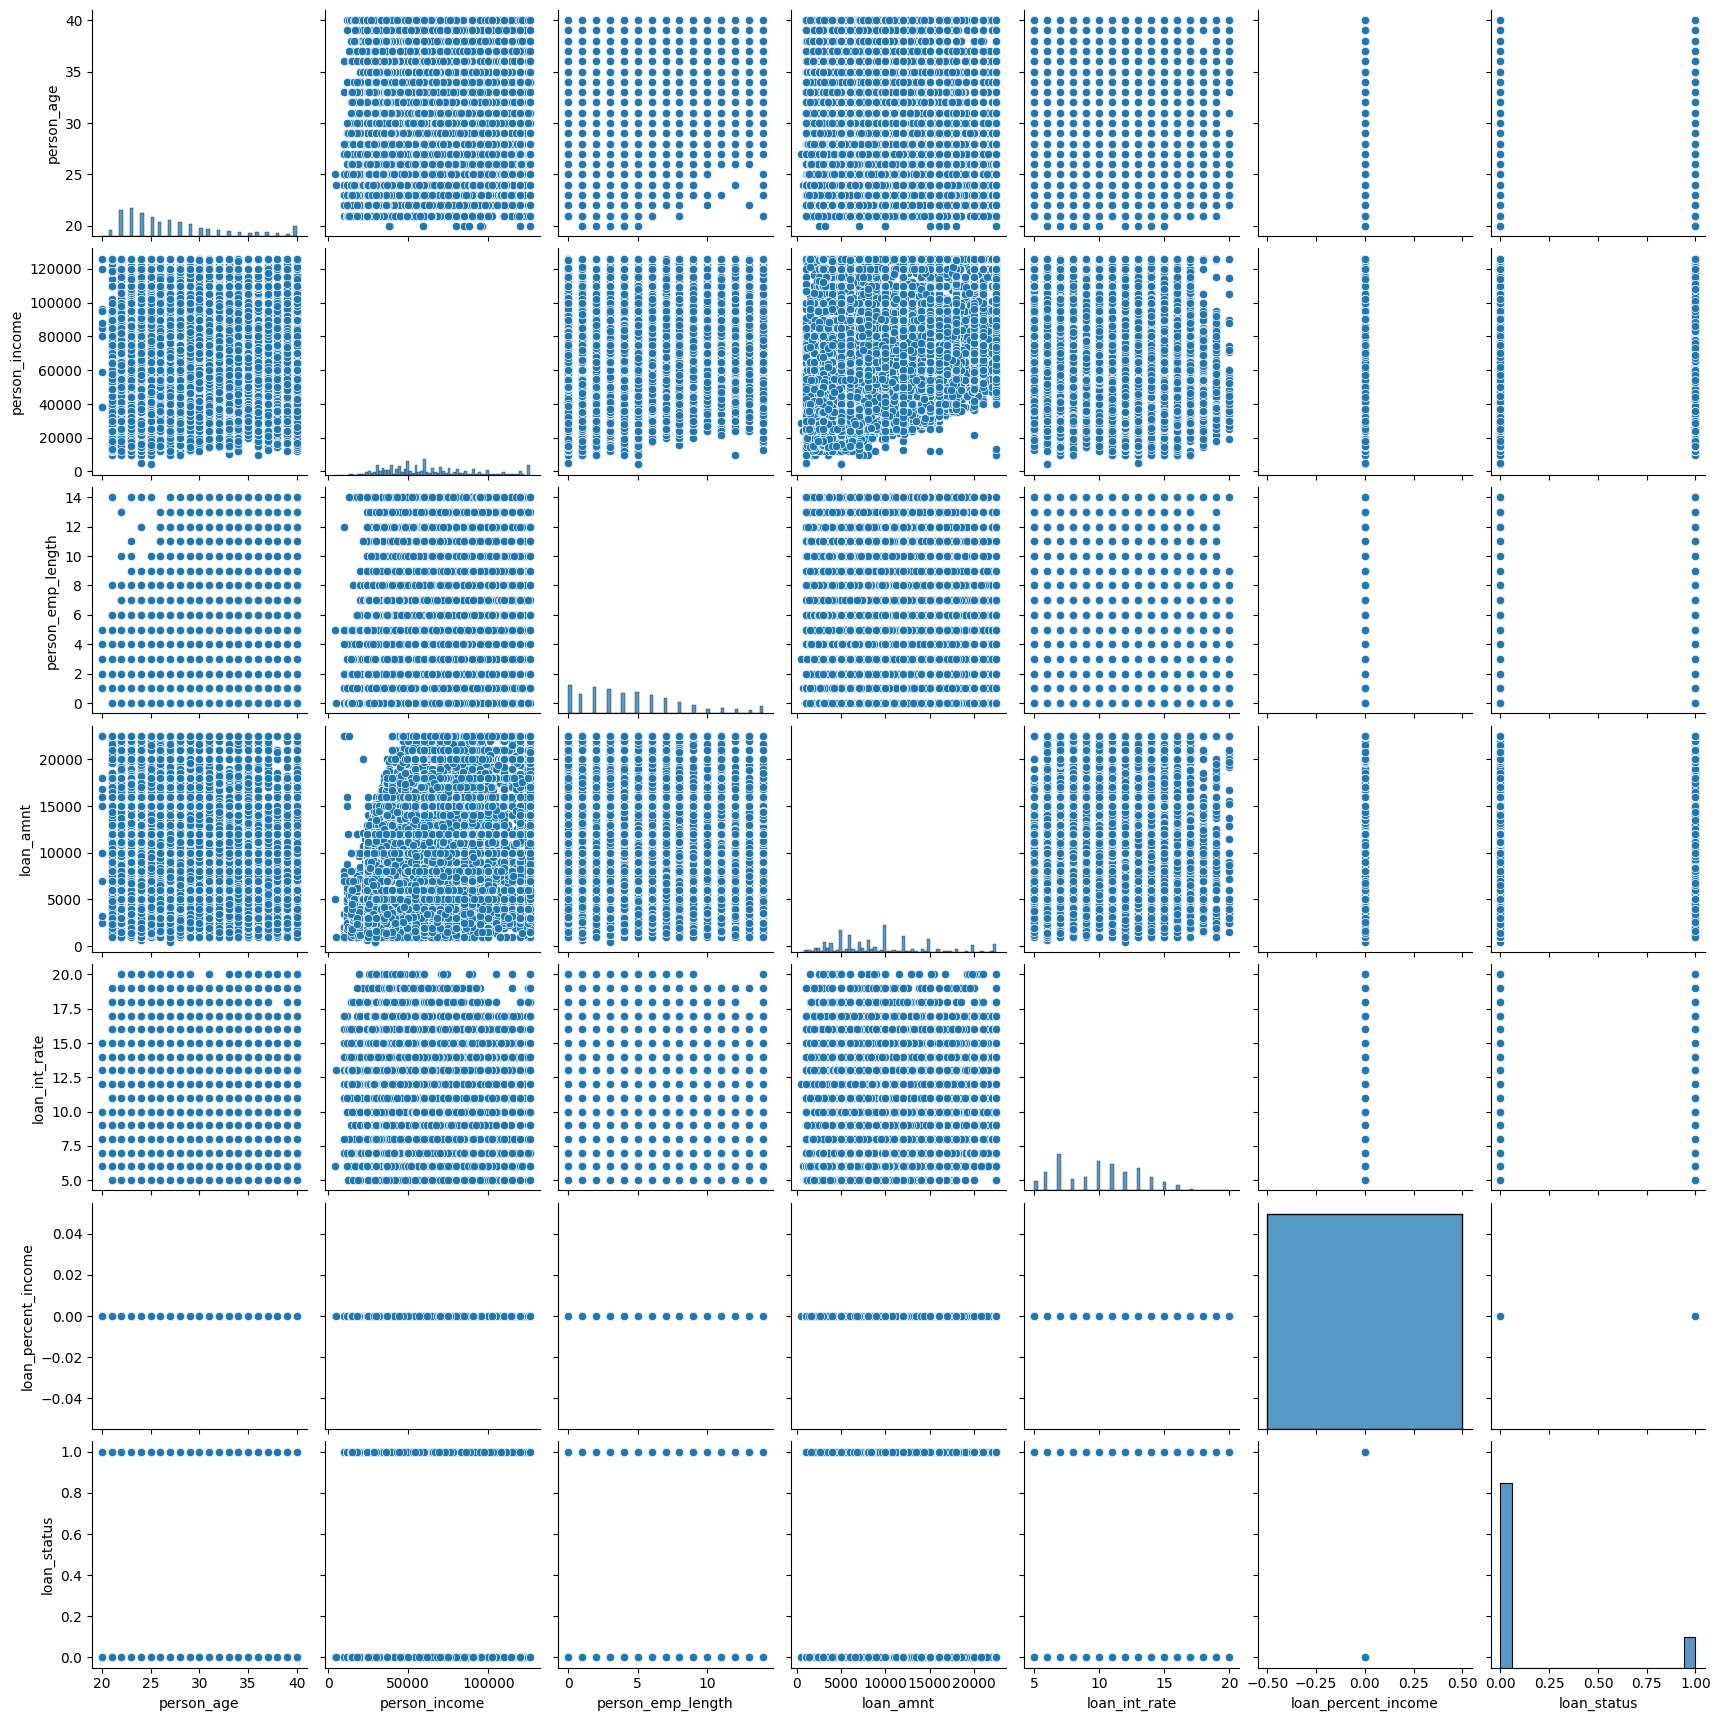

In [110]:
sns.pairplot(df)

# Machine Learning

In [111]:
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target

# Logistic Regression

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create Logistic Regression pipeline
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression())])

# Fit the model
logreg_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg_pipeline.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10087
           1       0.77      0.45      0.57      1642

    accuracy                           0.90     11729
   macro avg       0.84      0.72      0.76     11729
weighted avg       0.90      0.90      0.89     11729

Accuracy: 0.9040838946201722


#  Support Vector Machine (SVM)

In [113]:
from sklearn.svm import SVC

# Create SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC())])

# Fit the model
svm_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_pipeline.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


SVM Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10087
           1       0.91      0.64      0.75      1642

    accuracy                           0.94     11729
   macro avg       0.93      0.82      0.86     11729
weighted avg       0.94      0.94      0.94     11729

Accuracy: 0.9405746440446756


# K-Nearest Neighbors (KNN)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Fit the model
knn_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_pipeline.predict(X_test)
print("KNN Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


KNN Results:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10087
           1       0.84      0.61      0.70      1642

    accuracy                           0.93     11729
   macro avg       0.89      0.79      0.83     11729
weighted avg       0.92      0.93      0.92     11729

Accuracy: 0.9286384175974082


# XGBoost

In [115]:
from xgboost import XGBClassifier

# Create XGBoost pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier())])

# Fit the model
xgb_pipeline.fit(X_train, y_train)

# Predict and evaluate
test_preds = xgb_pipeline.predict(X_test)
print("XGBoost Results:")
print(classification_report(y_test, test_preds))
print("Accuracy:", accuracy_score(y_test, test_preds))


XGBoost Results:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10087
           1       0.88      0.75      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.92      0.87      0.89     11729
weighted avg       0.95      0.95      0.95     11729

Accuracy: 0.9502088839628272


# ROC curve for best Model Xgboost

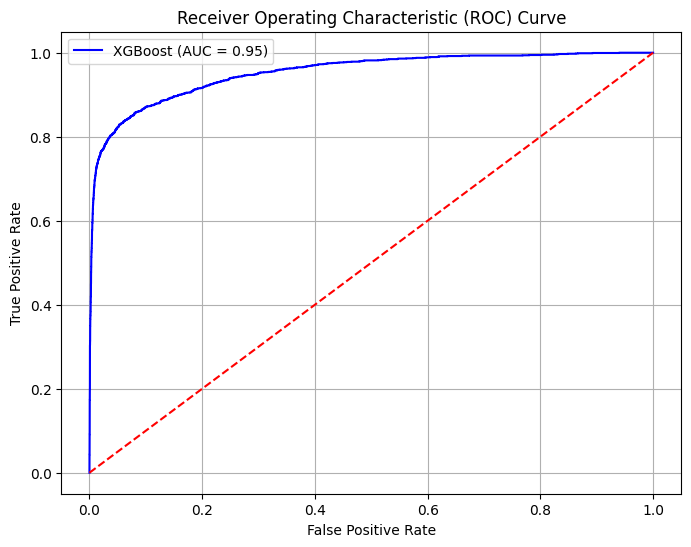

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create XGBoost pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])

# Fit the model
xgb_pipeline.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_pred_proba = xgb_pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"XGBoost (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


# Submission For xgboost

In [117]:
# Assuming df is your train data and df1 is your test data
train = df  # df is your training data
test = df1  # df1 is your test data

# Split the train data into X (features) and y (target)
X_train = train.drop('loan_status', axis=1)  
y_train = train['loan_status']  

# Use df1 as your test set (test set doesn't have labels)
X_test = test  

# Preprocessing for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# XGBoost pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])

# Train on full training data
xgb_pipeline.fit(X_train, y_train)

# Predict on the test set (probabilities for binary classification)
test_preds = xgb_pipeline.predict_proba(X_test)[:, 1]  # Get probability for the positive class (loan_status = 1)

# Load the sample submission file
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

# Fill the 'loan_status' column with predicted probabilities
sample_submission['loan_status'] = test_preds  

# Save the submission file
sample_submission.to_csv('/kaggle/output/submission.csv', index=False)

# Check the first 10 rows of the submission file
sample_submission.head(10)


,id,loan_status
0,58645,0.996029
1,58646,0.000909
2,58647,0.031941
3,58648,0.005795
4,58649,0.056042
5,58650,0.765187
6,58651,0.005750
7,58652,0.005933
8,58653,0.397913
9,58654,0.020748
